In [1]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import astropy.units as un
import scipy

In [3]:
from astropy.io import fits
map = fits.open('353.fits')

In [4]:
I = map[1].data['I_STOKES']
Q = map[1].data['Q_STOKES']
U = map[1].data['U_STOKES']

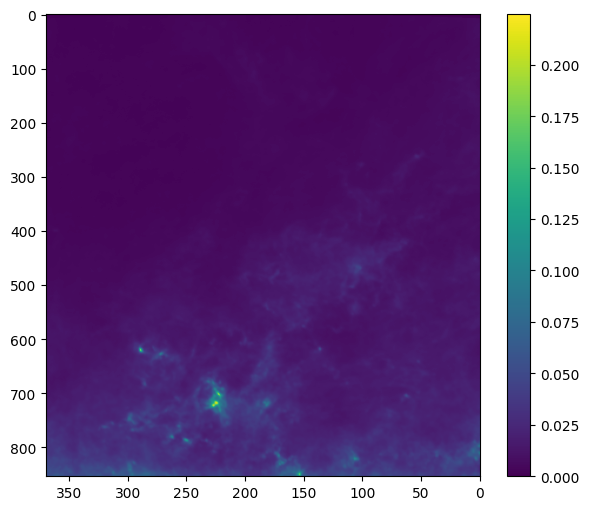

In [32]:
#m = np.arctan(q/u)

m = I

def display_pixels(sel_pix):
    pix_list = []

    onerow = list([sel_pix[0],])
    for i in range(1,len(sel_pix)):
        if sel_pix[i] == sel_pix[i-1] + 1:
            onerow.append(sel_pix[i])
        else:
            pix_list.append(onerow)
            onerow = [sel_pix[i],]

    sizex = np.max([len(j) for j in pix_list])
    sizey = len(pix_list)
    mat = np.zeros((sizey, sizex))

    for j in range(sizey):
        start_ind = int( sizex/2 + 1/2 ) - int( len(pix_list[j])/2 + 1/2 )
        new_pix_list = hp.ring2nest(nside_skymap, pix_list[j])
        mat[j,start_ind : start_ind + len(pix_list[j])] = m[new_pix_list]

    plt.figure(figsize=(7,6))
    plt.imshow(mat, aspect='auto')#, cmap='coolwarm')
    plt.gca().invert_xaxis()
    #plt.contour(mat, levels = np.linspace(0,np.max(mat),5), cmap='Reds')
    #plt.title(title)
    plt.colorbar()
    plt.show()
    return mat


if 1:
    ra, dec = 27*un.deg, 9*un.deg
    
    fact = 1
    
    side = 8
    side = side * un.deg
    
    cra = ([ra - side/np.cos(dec.value * np.pi/180), ra - side/np.cos(dec.value * np.pi/180), 
          ra + side/np.cos(dec.value * np.pi/180), ra + side/np.cos(dec.value * np.pi/180)])
    #print(cra.value)
    
    cdec = ([dec - side, dec + side, dec + side, dec - side])
   
    nside_skymap = hp.npix2nside(len(m))
    #tile_area = np.pi * radius.to(un.deg).value ** 2
    pixel_area = hp.nside2pixarea(nside_skymap, degrees=True)
    #probabilities = np.zeros(len(ra))
    vec = []
    
    for h in range(4):
        v = hp.ang2vec(cra[h].to(un.deg).value, cdec[h].to(un.deg).value, lonlat=True)
        vec.append(v)
    
    sel_pix = hp.query_polygon(nside_skymap, vec, inclusive=True, fact=fact, nest=True)
    
    sel_pix = hp.nest2ring(nside_skymap, sel_pix)
    sel_pix = np.sort(sel_pix)
    
    im = display_pixels(sel_pix)

In [33]:
sel_pix

array([17732136, 17732137, 17732138, ..., 24728349, 24728350, 24728351])

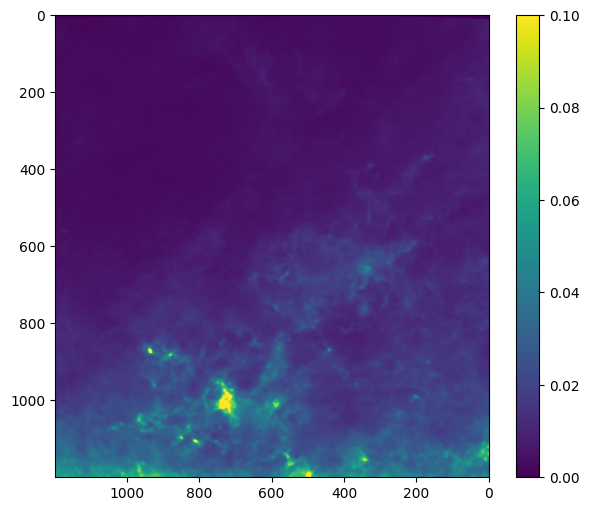

In [34]:
x = np.arange(im.shape[1])
y = np.arange(im.shape[0])

xn = np.arange(1200)
yn = np.arange(1200)

f = scipy.interpolate.interp2d(x, y, im, kind = 'cubic')

d = np.zeros((1200,1200))
d = f(xn*len(x)/1200, yn*len(y)/1200)

plt.figure(figsize=(7,6))
plt.imshow(d, aspect='auto',vmin=0,vmax=0.1)
plt.gca().invert_xaxis()
plt.colorbar()

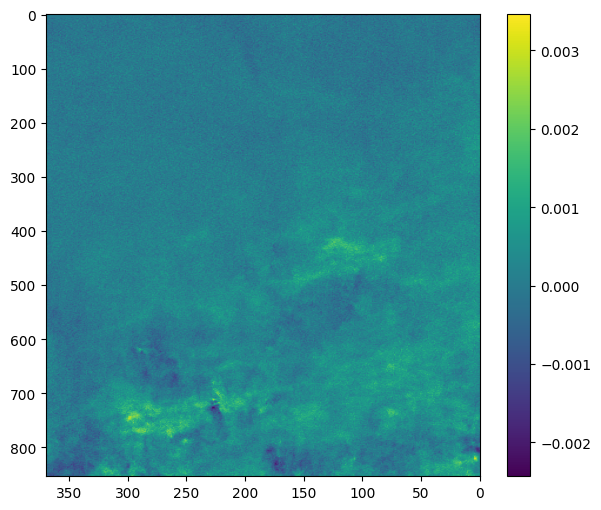

In [35]:
m=Q


if 1:
    
    sel_pix = hp.query_polygon(nside_skymap, vec, inclusive=True, fact=fact, nest=True)
    
    sel_pix = hp.nest2ring(nside_skymap, sel_pix)
    sel_pix = np.sort(sel_pix)
    
    q = display_pixels(sel_pix)

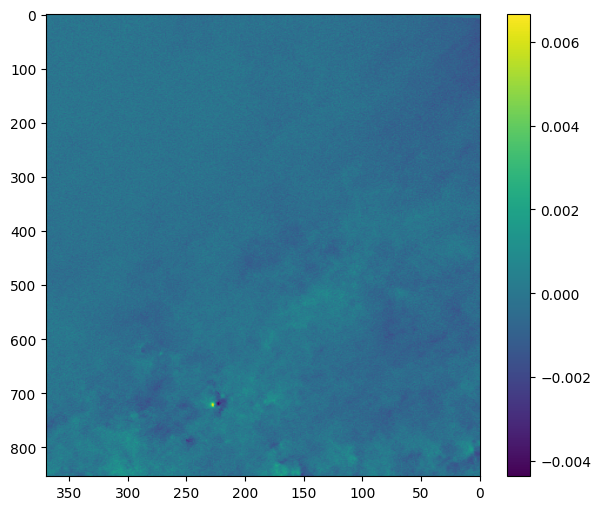

In [36]:
m=U

if 1:
    
    sel_pix = hp.query_polygon(nside_skymap, vec, inclusive=True, fact=fact, nest=True)
    
    sel_pix = hp.nest2ring(nside_skymap, sel_pix)
    sel_pix = np.sort(sel_pix)
    
    u = display_pixels(sel_pix)

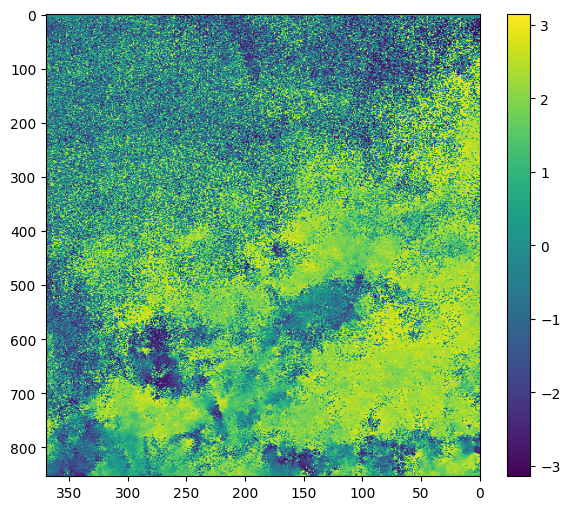

In [37]:
plt.figure(figsize=(7,6))
plt.imshow(np.arctan2(q,u), aspect='auto')
plt.gca().invert_xaxis()
plt.colorbar()

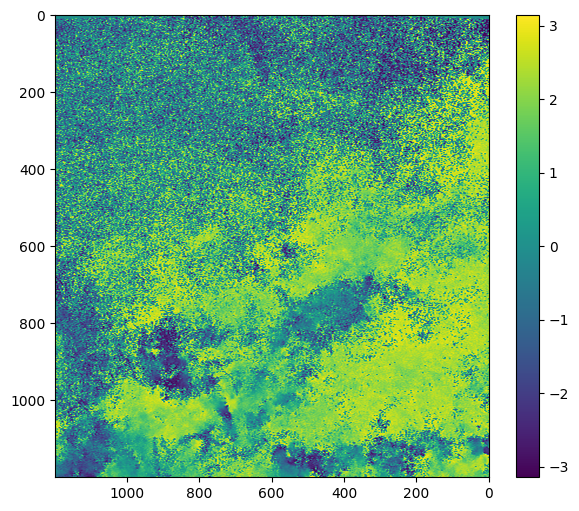

In [38]:
x = np.arange(u.shape[1])
y = np.arange(u.shape[0])

xn = np.arange(1200)
yn = np.arange(1200)

f = scipy.interpolate.interp2d(x, y, np.arctan2(q,u), kind = 'cubic')

a = np.zeros((1200,1200))
a = f(xn*len(x)/1200, yn*len(y)/1200)

plt.figure(figsize=(7,6))
plt.imshow(a, aspect='auto',vmin=-np.pi,vmax=np.pi)
plt.gca().invert_xaxis()
plt.colorbar()

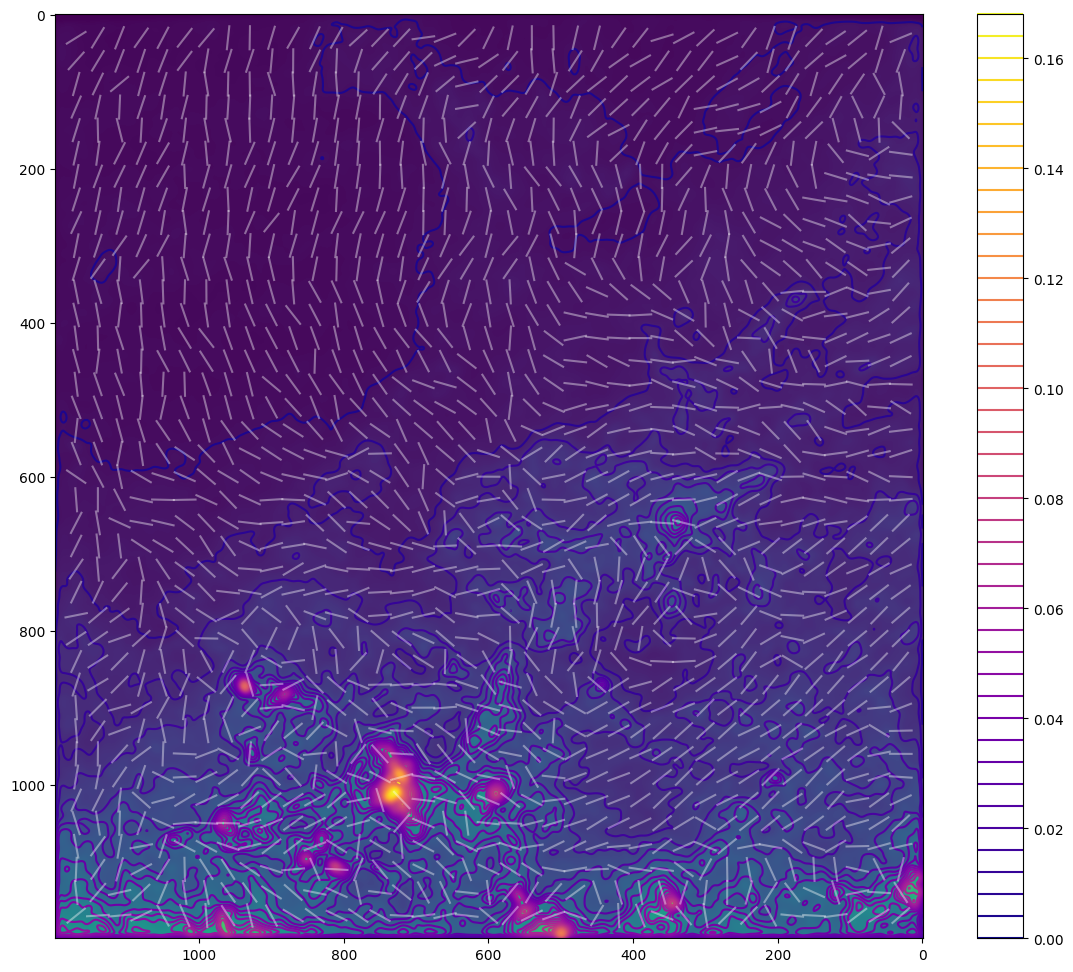

In [39]:
k = 15
step=30
n = 2
sm=4

#a = np.arctan2(q,u)

plt.figure(figsize=(14,12))

e = scipy.ndimage.gaussian_filter(d, [sm,sm], mode='constant')

plt.imshow(e, aspect='auto',alpha=1.0, vmax=0.1)#, cmap='Reds')
cs = plt.contour(e, levels=45, cmap='plasma')

a = f(xn*len(x)/1200, yn*len(y)/1200)
a=a+np.pi/2

for i in range(step,1200,step):
    for j in range(step,1200,step):
        ang = np.mean(a[i-int(step/n):i+int(step/n) , j-int(step/n):j+int(step/n)])
        
        #x1, x2, y1, y2 = j+k*np.sin(ang) , j-k*np.sin(ang) , i+k*np.cos(ang), i-k*np.cos(ang)
        x1, x2, y1, y2 = j+k*np.cos(ang) , j-k*np.cos(ang) , i+k*np.sin(ang), i-k*np.sin(ang)
        #y1, y2, x1, x2 = j+k*np.cos(ang) , j-k*np.cos(ang) , i+k*np.sin(ang), i-k*np.sin(ang)
        
        plt.plot([x1,x2],[y1,y2], color='white',alpha=0.4)
        
plt.gca().invert_xaxis()
plt.colorbar()
plt.show()

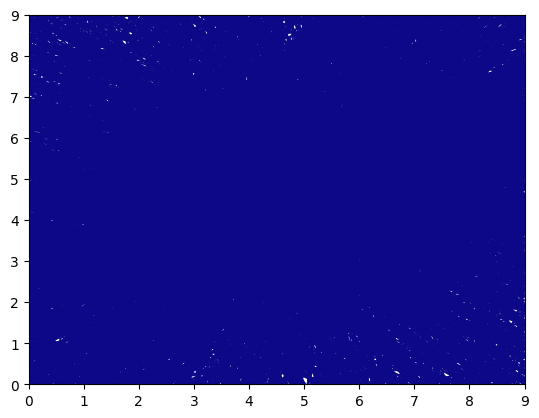

In [40]:
k = 15
step=30
n = 6
n1 = 2

rel = []

av = []

for i in range(step,1200,step):
    for j in range(step,1200,step):
        cutout = e[i-int(step/n):i+int(step/n) , j-int(step/n):j+int(step/n)]
        
        Iavg = np.mean(cutout)
        
        cs = plt.contour(cutout, levels=[Iavg], cmap='plasma')
        
        csa = cs.allsegs[0][:]
        g1, g2, h1, h2 = csa[0][0], csa[-1][0], csa[0][1], csa[-1][1]
        ori = np.mean(np.arctan2(h2-h1, g2-g1))
                
        ang = np.mean(a[i-int(step/n1):i+int(step/n1) , j-int(step/n1):j+int(step/n1)])
        
        if Iavg < 0.01:
            theta = np.abs(ang-ori) % np.pi
            theta = min(theta, np.pi-theta)
            rel.append(theta)
            av.append(Iavg)
        
        #plt.show()
        
        #print(len(cs.allsegs[0]))

823


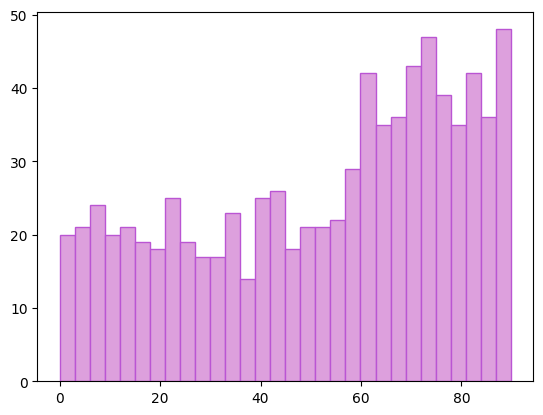

In [41]:
rel = np.array(rel)# % np.pi
av = np.array(av)
print(len(rel))
plt.hist(rel*180/np.pi, bins=30, color='plum', edgecolor='mediumorchid')
plt.show()

Text(0, 0.5, 'Intensity')

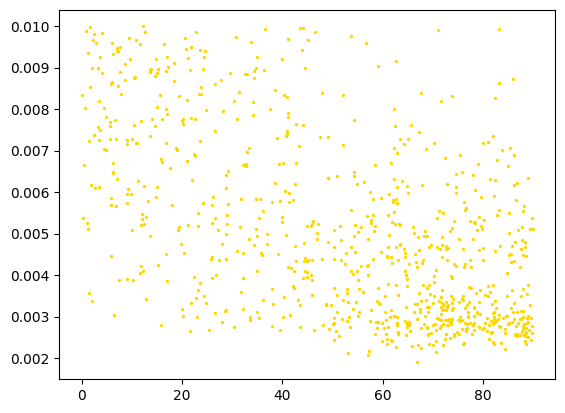

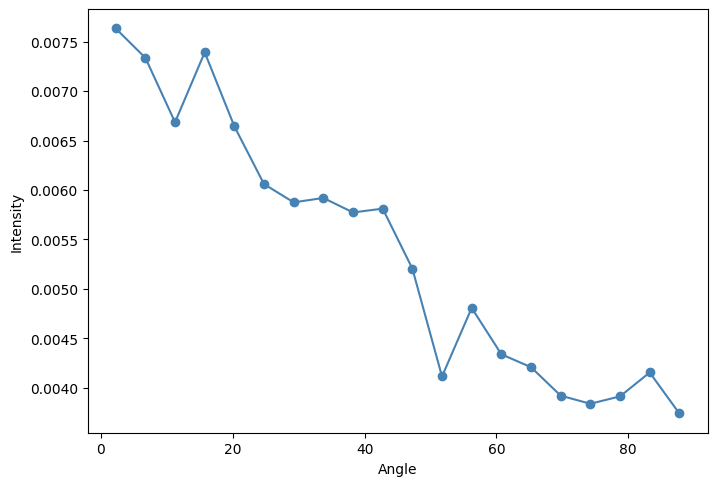

In [45]:
plt.scatter(rel*180/np.pi,av,s=2,color='gold')

def binplot(x, y, x1, x2, n):
    y = np.array(y)
    x = np.array(x)
    xmid = [x1 + (i+0.5)*(x2 - x1)/n for i in range(n)]
    yarr = []
    for m in xmid:
        ynew = y[np.where(np.abs(x - m) <= (x2-x1)/2/n)]
        yarr.append(np.mean(ynew))
    #print(xmid,yarr)   
    plt.plot(xmid, yarr, marker = 'o', color='steelblue')
    #plt.show()

plt.figure(figsize=(8,5.5))
binplot(rel*180/np.pi,av, 0, 90, 20)
plt.xlabel('Angle')
plt.ylabel('Intensity')

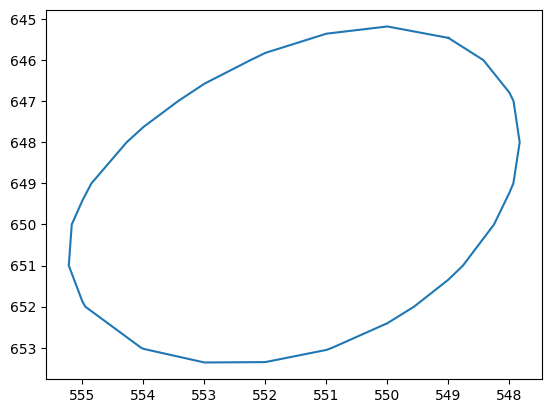

In [44]:
dat0= cs.allsegs[12][0]
plt.plot(dat0[:,0],dat0[:,1])
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

In [53]:
cs.allsegs[0][0][0]

array([0.        , 3.13242751])